<a href="https://colab.research.google.com/github/Cyborg-dev12/Smart_Vision_model/blob/main/smart_vision_flipkart_robotics_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python pytesseract torch torchvision yolo5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.3 MB/s eta 0:00:00
   ━━━

In [ ]:
# Install required libraries if not already installed
!sudo apt-get install tesseract-ocr
!pip install pytesseract opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Saving 31GcK11qXXL.jpg to 31GcK11qXXL.jpg
Image loaded successfully!
Extracted Text:



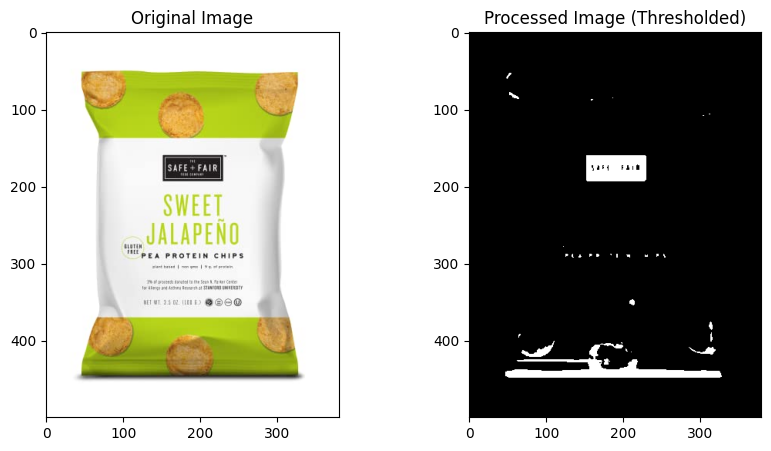

In [4]:

# Install required libraries if not already installed
!sudo apt-get install tesseract-ocr
!pip install pytesseract opencv-python


Saving 31ex89WvLxL.jpg to 31ex89WvLxL.jpg
Image loaded successfully!
Extracted Text:
 



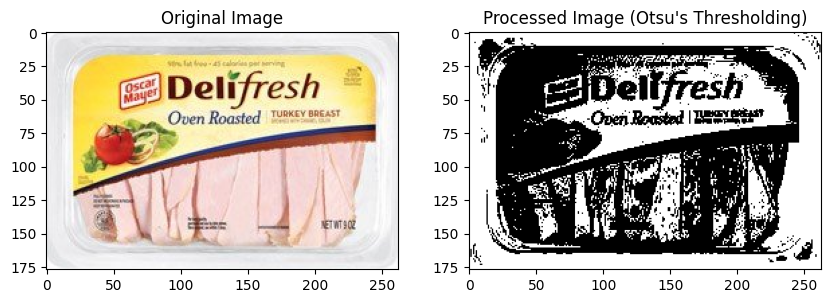

In [6]:


import cv2
import pytesseract
from google.colab import files
from matplotlib import pyplot as plt

# Function to preprocess the uploaded image
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Enhance contrast by applying histogram equalization
    contrast_enhanced = cv2.equalizeHist(gray)

    # Use Otsu's Thresholding for better binarization
    _, thresh = cv2.threshold(contrast_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresh

# Function to extract text from the image using pytesseract
def extract_text(image):
    text = pytesseract.image_to_string(image)
    return text

# Upload the image file
uploaded = files.upload()

# Load the uploaded image using OpenCV
for filename in uploaded.keys():
    image = cv2.imread(filename)

# Check if the image is loaded properly
if image is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully!")

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Extract text from the preprocessed image
    extracted_text = extract_text(processed_image)

    print("Extracted Text:")
    print(extracted_text)

    # Optionally, display the original and processed images
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    # Display processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title("Processed Image (Otsu's Thresholding)")

    plt.show()


In [17]:
# Install necessary libraries
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Saving example_010.jpg to example_010 (1).jpg
Extracted Text:
  

Result: The product is NOT defective.


In [20]:
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless
import cv2
import pytesseract
import re
from google.colab import files
import os
def extract_text_from_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    extracted_text = pytesseract.image_to_string(gray_image)
    return extracted_text
def check_if_defective(text):
    defect_keywords = ['defect', 'error', 'broken', 'failure', 'damaged', 'fault', 'malfunction']
    for keyword in defect_keywords:
        if re.search(keyword, text, re.IGNORECASE):
            return True
    return False
def check_product(image_path):
    extracted_text = extract_text_from_image(image_path)
    print("Extracted Text:\n", extracted_text)
    is_defective = check_if_defective(extracted_text)

    if is_defective:
        print("Result: The product is DEFECTIVE.")
    else:
        print("Result: The product is NOT defective.")
uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename
check_product(image_path)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Saving 31CwBXxyu4L.jpg to 31CwBXxyu4L (1).jpg
Extracted Text:
 Blessing from
ee

    
 

Jerusal
“Anointing Olt

Result: The product is NOT defective.
